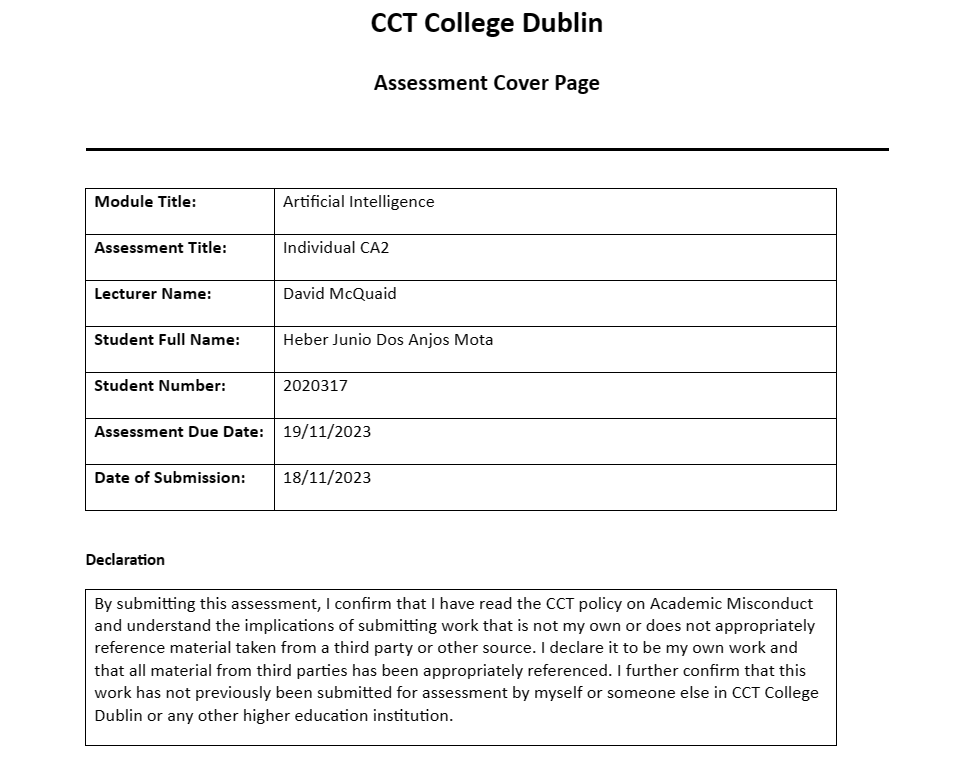

# Introduction

   In this assestment, we are required to carry out analysis, research and development of a AI based solution for a graph challenge provided in the brief for this assestment.
   
   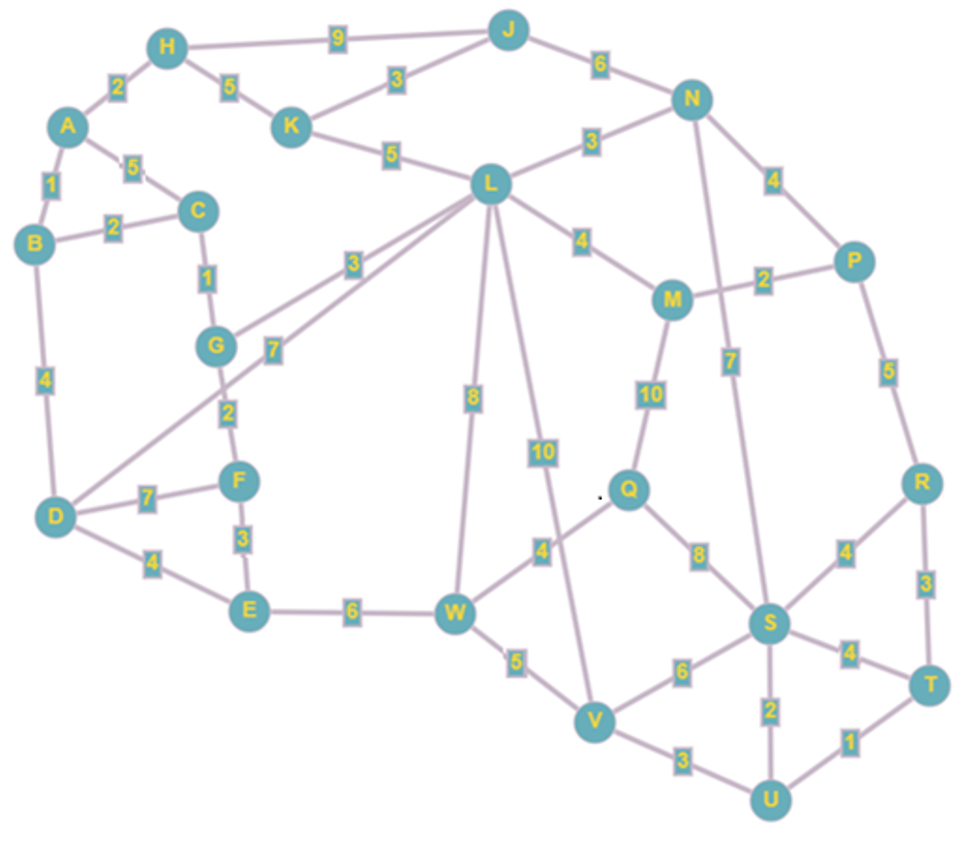
   
### The Github Repository for this assestment can be found here: https://github.com/heber2020317/AI_CA2_2023

____

## Differences between a Graph & a Tree

Some of the defining features of each one can be found below:

### Trees 
- Hierarchical (parent-child relationship);
- Each node has 1 or 2 edges (connections);
- Its edges are always directed;
- There is an exclusive Root Node;
- Acyclic Structure;
- Some types include: binary (max 2 children per node), binary search (binary but with ordering properties)
- Generally used to depict hierarchical structures - family trees, file systems, charts, etc

### Graphs
- Can be Hierarchical or not;
- Nodes can have from none to unlimited number of edges (connections);
- There is no Root Node;
- Its edges can be directed or not;
- can have either Cyclic or Acyclic Structure;
- Could contain weighted edges;
- Some types include: directed and indirected graphs, bipartite, weighted, etc;
- Generally used to depict complex relationships - social or transport networks, circuits, designs etc.


____

## How the Graph is an abstraction of the problem

The graph can be considered an abstraction of the problem by giving a simplified representation of what could be a real life problem/situation or even a map of a interconnected network or structure that can be too complex to be fully analysed without a visual representation. 

 For instance, the graph shown above could be an abstraction of a Map where the different edges mean the distance/hardship of cruising from one point (location) to another, therefore, by visualizing in a simplified manner we can make better choices and act accordingly.
 
 Below, there is a similar example of how a graph could represent a real life situation:
 
 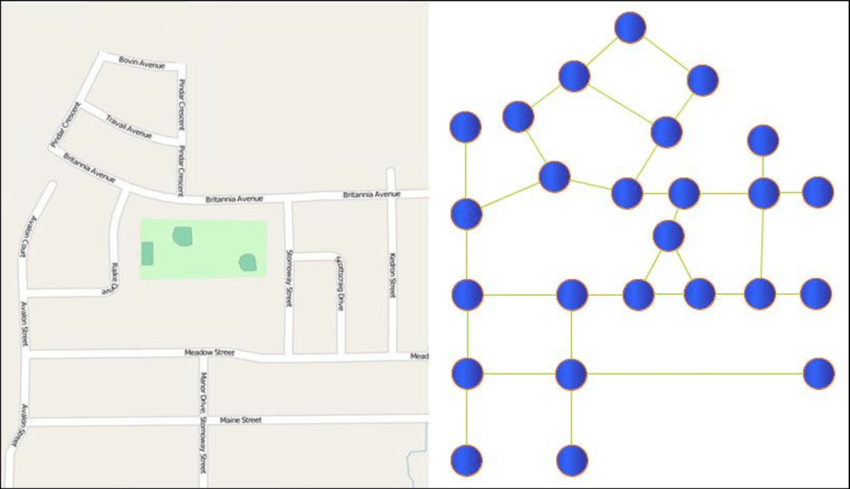
 
 ____

## Advantages of using a Visual Representation (Graphs)

The visual representation of Data as images and graphs is a technique that links all the way back to the 18th century with less complex representations, however, it was only with technology that it became possible to turn graphs into something even better: the processing of huge amounts of data in a interactive and extremely fast manner while still visually pleasant.

Graphic Representations can vary in several categories, such as line, bar, pie, area, network, directed or undirected as well as weighted graphs, histograms, tree diagrams,  among many others. Displaying data making use of its best suitable graph type can bear incredible benefits, including:

- Identifying trends, correlations and anomalies within data; 
- Better understanding, memorization and logical analysis from imagery; 
- Carrying out data manipulation, trying different insights and angles using its interactive tools and visualizations from complex data;
- Allows dinamic data sharing and collaboration.

When it comes to Weighted Graphs such as the one used in this assestment (image in "Introduction"), some benefits are:

- As each edge contains a "weight" or a value, it can help representing levels of importance, easier/harder or lower/higher comparisons in different routes through the graph, which is helpful in situations like calculating and analysisng costs, distances and probabilities;  
- Application of "weights" in useful daily basis applications that helps in data-driven decision making, such as finance, machine learning or transport network where these weights will be the key for the final decision. 
- Deep analysis and comprehension of node connections, behaviours, and data integration of different sources through its underlying patterns

___

## Demonstrating Dijkstra's Algorithm

For this section of the assestment, I will demonstrate how Dijkstra's algorithm work. I made a simplified diagram that depicts its functionality where it analyses every node in search of the best path to get to the destination node. We can note that the green lines/vertices are the chosen ones to our final node, and the red ones are the ones that did not make it to the shortest path. Although it was found the shortest path, the algorithm still checks every node to ensure its effectiviness, and then, once it gets to the destination node, it then, goes back to the starting node through the shortest path among all possibilities.

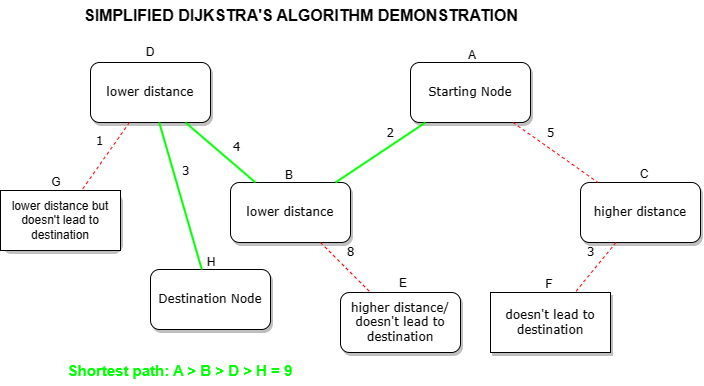

For the practical demonstration, we are going to use the "heapq" module that enables us to add a priority queue (heap queue) to our operations in order to find the shortest path for the solution we look for in our graph.

In [23]:
import heapq

def calculate_distances(graph, start_vertex): #starting vertices
    distances = {vertex: float('infinity') for vertex in graph}
    distances[start_vertex] = 0 # defining first node as 0
    pq = [(0, start_vertex)] # priority in storing vertices along with their values
    previous_nodes = {vertex: None for vertex in graph} #storing prveious nodes

    while pq: #usgin shortest distance vertex as priority
        current_distance, current_vertex = heapq.heappop(pq)

        #in case the current node path is higher then skip
        if current_distance > distances[current_vertex]: 
            continue

            #looping into nodes around
        for neighbor, weight in graph[current_vertex].items():
            distance = current_distance + weight

            #calculation of neighbor node and choose shorter path
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_vertex
                heapq.heappush(pq, (distance, neighbor))

    return distances, previous_nodes

In [24]:
def reconstruct_path(previous_nodes, end_vertex):
    #goes back from last node to first to check shorter path
    path = []
    current_vertex = end_vertex
    while current_vertex is not None:
        path.insert(0, current_vertex)
        current_vertex = previous_nodes[current_vertex]
    return path

Following, we are going to especify the values of our weighted graph, which is done below: 

In [25]:
#representation our weighted graph
my_graph = {
    'A': {'B': 1, 'H': 2, 'C': 5},
    'B': {'A': 1, 'D': 4, 'C': 2},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'L': 7, 'F': 7, 'E': 4},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'L': 3, 'F': 2},
    'H': {'A': 2, 'K': 5, 'J': 9},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'K': 5, 'N': 3, 'G': 3, 'D': 7, 'W': 8, 'V': 10, 'M': 4},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'S': 7, 'P': 4},
    'P': {'N': 4, 'M': 2, 'R': 5},
    'Q': {'M': 10, 'W': 4, 'S': 8},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'N': 7, 'Q': 8, 'V': 6, 'U': 2, 'T': 4, 'R': 4},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'V': 3, 'S': 2, 'T': 1},
    'V': {'W': 5, 'U': 3, 'L': 10, 'S': 6},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

In the snippet below it is possible to choose the starting node as well as the final node in which we want to search the distances, as requested by the briefing of this assestment, I have set it to start from 'A' to 'S' as shown:

In [26]:
#here, we can define which nodes will be the starting and ending node
start_node, end_node = 'A', 'S'
#making path calculations using dijkstra's algorithm
distances, previous_nodes = calculate_distances(my_graph, start_node)
#goes back reconstructing shortest path
shortest_path = reconstruct_path(previous_nodes, end_node)

Finally, to display our output, I decided to give the path in detail, showing the starting node, the following nodes up to the final one along with the total distance of the shortest path as well.

In [27]:
print(f"Shortest path from {start_node} to {end_node}: {shortest_path}")
print(f"Distance: {distances[end_node]}.")

Shortest path from A to S: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Distance: 17.


## Comparing A* and Dijkstra's Algorithms



___

## References

https://www.tutorialandexample.com/what-is-the-difference-between-tree-and-graph

https://moodle.cct.ie/mod/resource/view.php?id=143304

https://moodle.cct.ie/mod/resource/view.php?id=143303

https://moodle.cct.ie/mod/resource/view.php?id=143315

https://moodle.cct.ie/mod/resource/view.php?id=143317

https://moodle.cct.ie/mod/resource/view.php?id=143312

https://moodle.cct.ie/mod/resource/view.php?id=143313